
### Generate random fruit lengths from the height linear model we made yesterday (using the correct scale). Then, fit the model on this new generated data and obtain the slope and intercept. 
	
- Visualize the predictons from the new data by adding these predictions to the plot we made in exercise 4.5.2 (so you should have your points, the real data predictions in red, and add the new generated data predictions in green)
- Write ONE SENTENCE comparing the slope (the number) of the new model, and the visualization to each other and to the original model on the real data
The new model has generated

Old model
 const     11.941920
height     0.069106
dtype: float64
New model
 const     12.268918
height     0.061113
dtype: float64


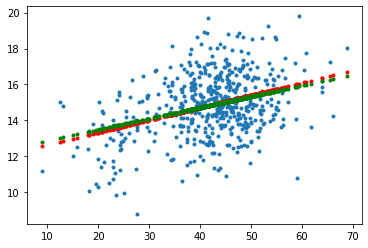

In [11]:
# Import packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create the model
fruit_length_geno = pd.read_table("../data/arabmagic/fruit_length_geno.csv",sep=",",index_col=0)
to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],"height":fruit_length_geno['height']})
to_model = sm.add_constant(to_model)
to_model = to_model.dropna()
X = to_model.loc[:, ['const', 'height']]
y = to_model['fruit_length']
model_height = sm.OLS(y, X).fit()

# Print coefficients of the old model
print("Old model\n", model_height.params)

# Find the standard deviation in fruit_lengths
std_fruit = y.std()
# Use the model to generate locs based on the data
locs = model_height.predict(X)
# Generate random fruit lengths based on the model (with the standard deviation of fruit_lengths)
pred = norm.rvs(loc=locs, scale = std_fruit)
model_height_new = sm.OLS(pred, X).fit()

# Print coefficients of the new model
print("New model\n", model_height_new.params)
predlocs = model_height_new.predict(X)

# Create visualization 
f, ax = plt.subplots(1)
# Old data
ax.plot( to_model['height'], to_model['fruit_length'],'.')
# Model (in red)
ax.plot( to_model['height'], locs,'.', color='red')
# New data (in green)
ax.plot( to_model['height'], predlocs,'.', color='green')